# Personal Finance Analysis

In the past few months I've been tracking my costs and revenue. In the early days I mostly wanted to become independant and have full control over my bank accounts and revenues. tTese days in quarantine has given us all, some time to rethink our lives and our decisions. 

So as a data driven researcher and data visualization lover, I thought maybe I can get some insights from all the data that I've collected. So I wrote this notebook to first analyze myself and then maybe help a few other people get their own analysis tools and vision!

This is a view of my excel spreadsheet. I'll leave a link to where you can download it.

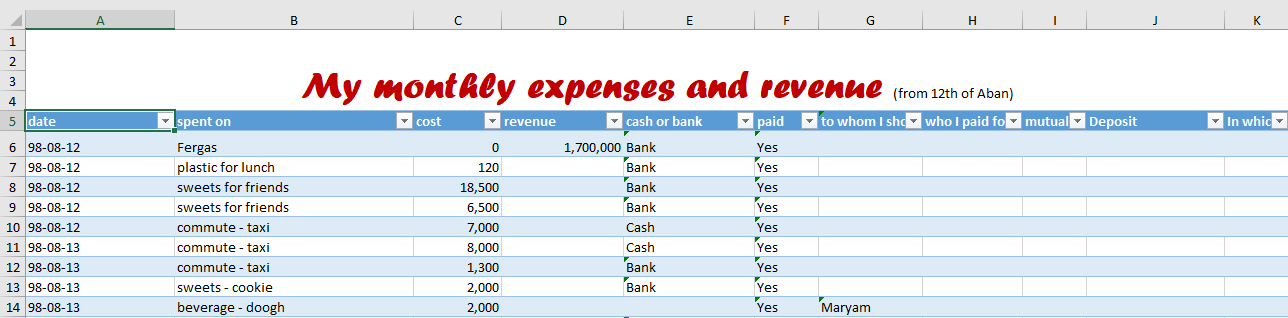

I've included my thoughts through out the notebook. Feel free to contact me for help or more info.

Let's go then!

In [102]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import jdatetime
import re
import plotly.express as px
plt.rcParams["font.family"] = "Comic Sans"
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 12
plt.style.use('seaborn-whitegrid')

In [119]:
df = pd.read_excel(r'D:\personal data\Expences.xlsx', header = 4).dropna(axis = 0, how = 'all')
df.head()

,date,spent on,cost,revenue,cash or bank,paid,to whom I should repay,who I paid for,mutual,Deposit,In which account
0,98-08-12,Fergas,0.0,1700000.0,Bank,Yes,NaN,NaN,NaN,NaN,NaN
1,98-08-12,plastic for lunch,120.0,NaN,Bank,Yes,NaN,NaN,NaN,NaN,NaN
2,98-08-12,sweets for friends,18500.0,NaN,Bank,Yes,NaN,NaN,NaN,NaN,NaN
3,98-08-12,sweets for friends,6500.0,NaN,Bank,Yes,NaN,NaN,NaN,NaN,NaN
4,98-08-12,commute - taxi,7000.0,NaN,Cash,Yes,NaN,NaN,NaN,NaN,NaN


In [120]:
df.date = df.date.apply(lambda x : jdatetime.datetime.strptime('13' + x, '%Y-%m-%d'))

In [121]:
df['Month'] = df.date.apply(lambda x : jdatetime.datetime.strftime(x, '%Y-%m'))

In [122]:
#df['Day_num'] = df.date.apply(lambda x : jdatetime.datetime.strftime(x, '%d'))

In [123]:
df['Week_day'] = df.date.apply(lambda x : jdatetime.datetime.strftime(x, '%A'))

## a visual overview of the whole dataset

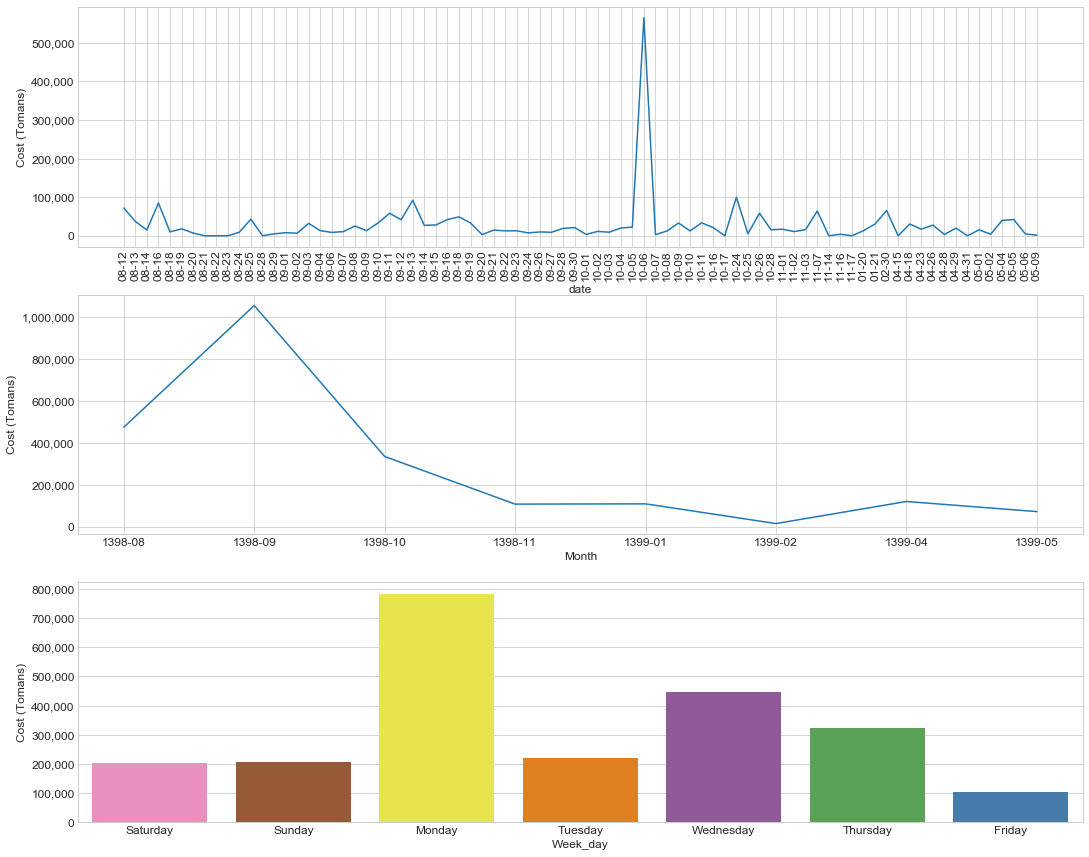

In [127]:
cat = ['Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday' ]

daily_costs = df.groupby('date').sum().cost.reset_index()
monthly_costs = df.groupby('Month').sum().cost.reset_index()
Week_day_costs = df.groupby('Week_day').sum().cost.reindex(cat).reset_index()


fig, ax_ = plt.subplots(3, 1, figsize = (18,15))

line1 = sns.lineplot(x = daily_costs.date.apply(lambda x :x.strftime('%m-%d')), y = daily_costs.cost, ax = ax_[0])
line2 = sns.lineplot(x = monthly_costs.Month, y = monthly_costs.cost, ax = ax_[1])
line3 = sns.barplot(x = Week_day_costs.Week_day, y = Week_day_costs.cost, ax = ax_[2],  palette = 'Set1_r')
line1.set_xticklabels(daily_costs.date.apply(lambda x :x.strftime('%m-%d')), rotation=90);
for i in range(3):
    ax_[i].set_yticklabels(['{:,}'.format(int(x)) for x in ax_[i].get_yticks().tolist()]);
    ax_[i].set_ylabel('Cost (Tomans)')

Here we see that generally there is a downward trend. Specially after the last months of 1398 wich quarantine started and I no longer went to the university and didn't have to pay so much for commute. Along side commuting, I didn't generally go out and didn't even buy anything to eat. So there is a minimum in the second month but as time went by, I found it pretty difficult to keep staying indoors and either went out and spent cash, or bought books or accessories online to make myself feel better at home :))

Also, we have a very big spike in one specific date. I can't really rely on the daily results right now, because I can see there was a huge cost in a specific date. Let's see what it is.

In [8]:
most_frequent = pd.DataFrame(df[df.revenue.isnull()]['spent on'].value_counts()).reset_index()
most_frequent.columns = ['spent on', 'cost']

In [237]:
most_frequent.head()

,spent on,cost
0,commute - taxi,69
1,sweets - chocolate cake,25
2,nuts,12
3,sweets - chocolate,11
4,plastic for lunch,9


In [9]:
most_costly = pd.DataFrame(df[df.revenue.isnull()].groupby('spent on').sum()['cost'])\
.sort_values(by = 'cost', ascending = False).reset_index()

In [239]:
most_costly.head()

,spent on,cost
0,health - drugs,509800.0
1,commute - taxi,416400.0
2,self indulgence - book,117500.0
3,self indulgence - dying hair,80000.0
4,sweets - café,77500.0


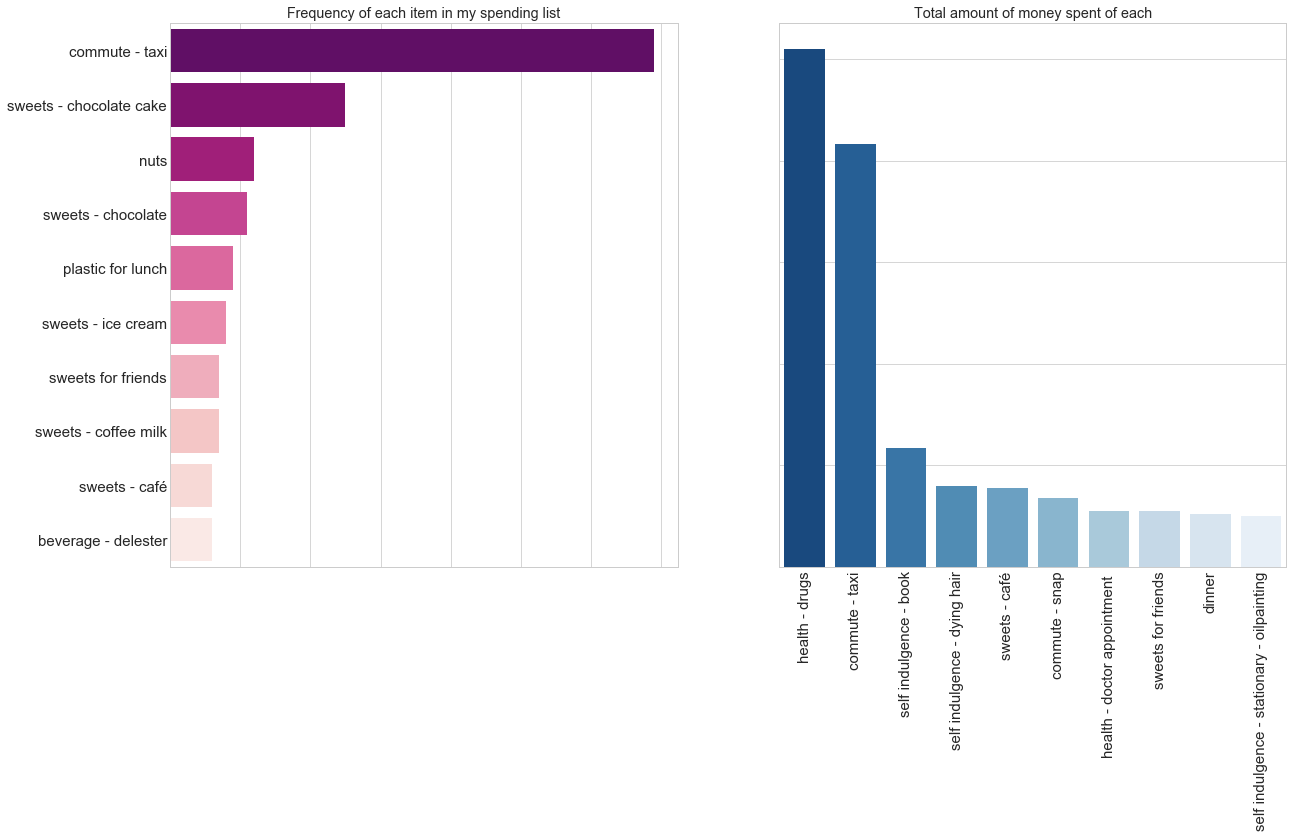

In [101]:

plt.rcParams['figure.figsize'] = (20, 10)
fig, ax_ = plt.subplots(1, 2)
bar1 = sns.barplot(x = most_frequent['cost'].head(10), y = most_frequent.head(10)['spent on'],
            ax = ax_[0], palette = 'RdPu_r',)
bar2 = sns.barplot(y = most_costly['cost'].head(10), x = most_costly.head(10)['spent on'],
            ax = ax_[1], palette = 'Blues_r')


title = ['Frequency of each item in my spending list',
        'Total amount of money spent of each']

bar2.set_xticklabels(most_costly.head(10)['spent on'], rotation=90);
for i in range(2):
    ax_[i].set_title(title[i]) 
    ax_[i].set_ylabel('') 
    ax_[i].set_xlabel('') 
    
    ax_[i].set_yticklabels(labels =ax_[i].get_yticklabels() ,
                       fontsize = 15)
    ax_[i].set_xticklabels(labels =ax_[i].get_xticklabels() ,
                       fontsize = 15)

In [17]:
medicine = int(most_frequent[most_frequent['spent on'].str.contains('health - drugs')].cost)
commute = int(most_frequent[most_frequent['spent on'].str.contains('commute')].cost.sum())
print('Commute frequency: ', commute )
print('medicine frequency: ', medicine)
print('frequency ratio: {:.2f} '.format( medicine / (medicine + commute)))

Commute frequency:  73
medicine frequency:  2
frequency ratio: 0.03 


The difference was so radical that without taking the max or searching for a specific date, I could find the culprit. Drugs. No certainly not for smoking but for my health, skin and body. I've spent that much just once and I'm surely not doing it again. So we concider it an outlier and delete it to see the actual data better.

In [128]:
df.drop(index = df[df['spent on'].str.contains('drugs')].index, inplace = True)

Now we draw the lines again.

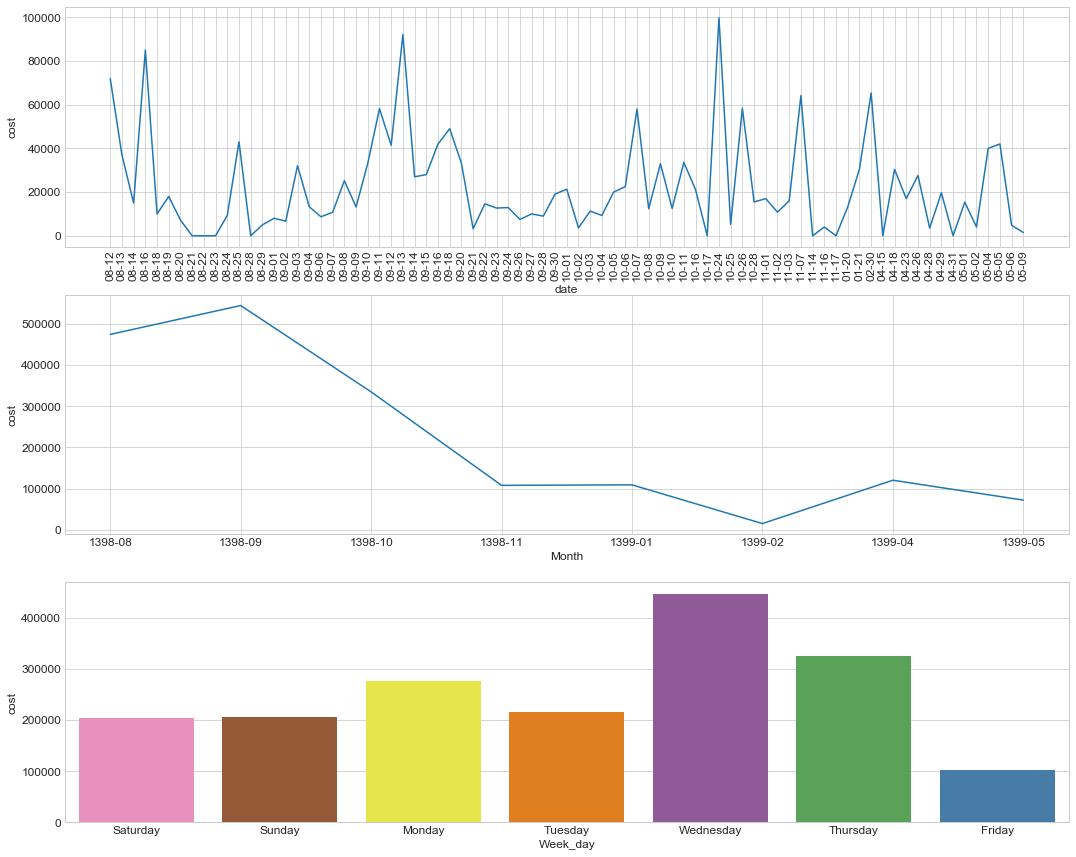

In [130]:
cat = ['Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday' ]

daily_costs = df.groupby('date').sum().cost.reset_index()
monthly_costs = df.groupby('Month').sum().cost.reset_index()
Week_day_costs = df.groupby('Week_day').sum().cost.reindex(cat).reset_index()


fig, ax_ = plt.subplots(3, 1, figsize = (18,15))

line1 = sns.lineplot(x = daily_costs.date.apply(lambda x :x.strftime('%m-%d')), y = daily_costs.cost, ax = ax_[0])
line2 = sns.lineplot(x = monthly_costs.Month, y = monthly_costs.cost, ax = ax_[1])
line3 = sns.barplot(x = Week_day_costs.Week_day, y = Week_day_costs.cost, ax = ax_[2],  palette = 'Set1_r')
line1.set_xticklabels(daily_costs.date.apply(lambda x :x.strftime('%m-%d')), rotation=90);

From what I can conclude about myself, I think whenever I need a recharge, I tend to spend the most. During the first two days of each week I'm still hyped by the energy of weekend. But as we go on I try to spend a little more and give myself a little prizes to get my mind and body going!

## Now let's separate each group and see how much I spend on each category and subcategory costed me most

In [165]:
# separating the categories and sub_categories
df[['category','sub_category']] = df['spent on'].str.split('-',1 , expand=True)

In [133]:
df_1 = df[df.revenue.isnull()].groupby(['category']).sum().cost.reset_index().sort_values(by = 'cost' ,ascending = False)
df_1.head(5)

,category,cost
6,commute,484150.0
27,self indulgence,363600.0
28,sweets,277000.0
23,present for,58500.0
13,health,55000.0


In [22]:
costly = list(df_1.category.head(6))
costly

['commute ',
 'self indulgence ',
 'sweets ',
 'present for ',
 'health ',
 'sweets for friends']

In [135]:
df_2 = df[(df.revenue.isnull()) & (df.category.isin(costly))].groupby(['date', 'category' ]).sum().cost.reset_index().sort_values(by = ['date', 'category'])
df_2.head(5)

,date,category,cost
0,1398-08-12 00:00:00,commute,7000.0
1,1398-08-12 00:00:00,sweets for friends,25000.0
2,1398-08-13 00:00:00,commute,9300.0
3,1398-08-13 00:00:00,sweets,2000.0
4,1398-08-14 00:00:00,commute,3200.0


In [47]:
px.line( x=df_2.date, y=df_2['cost'], color = df_2['category'],
        title = 'Different spendings over time', line_shape = 'vh')

So I've been again spending much more on each category (exept for maybe self indulgence that was needed for suvival).

In [192]:
df_ = df[df.revenue.isnull()].groupby(['category','sub_category']).sum().reset_index()
df_.head()

,category,sub_category,cost,revenue,Deposit
0,For family,bread,7000.0,0.0,0.0
1,Market share,made a deposit,0.0,0.0,460000.0
2,beverage,delester,20000.0,0.0,0.0
3,beverage,doogh,2000.0,0.0,0.0
4,beverage,hot chocolate,4000.0,0.0,0.0


In [191]:
df_ = df[df.revenue.isnull()].groupby(['category','sub_category']).sum().reset_index()
fig = px.treemap(df_, path=['category', 'sub_category'], values='cost', title = 'Visual Distribution of My Expences'
                  ,color = 'cost')
fig.show()

In [ ]:
df = city_day.drop(columns = ['Date', 'AQI_Bucket', 'AQI']).groupby('City').sum().reset_index()
fig = px.treemap(pd.melt(df, id_vars = 'City'), path=['City','variable'],
                 values=pd.melt(df, id_vars = 'City')['value'],
                 title = 'Cities and the proportion of pollution in each')
fig.show()

In [140]:
df[(df['sub_category'].notnull()) & (df['revenue'].isnull())].category.unique()
# I omit those that only have one specific sub-category

array(['commute ', 'sweets ', 'beverage ', 'self indulgence ', 'learning',
       'lunch ', 'present for ', 'sweets for friends ', 'health ',
       'self amusing ', 'maintenance ', 'dinner ', 'dad ', 'For family ',
       'Market share '], dtype=object)

In [137]:
# sweets
sweets = df[df['category'].str.contains('sweets')]
serie_1 = sweets.groupby('sub_category').sum().cost.sort_values(ascending = False)


# self indulgence
indulgence = df[df['category'].str.contains('indulgence')]
serie_2 = indulgence.groupby('sub_category').sum().cost.sort_values(ascending = False)

# beverage
commute = df[df['category'].str.contains('beverage')]
serie_3 = commute.groupby('sub_category').sum().cost.sort_values(ascending = False)

# commute
commute = df[df['category'].str.contains('commute')]
serie_4 = commute.groupby('sub_category').sum().cost.sort_values(ascending = False)




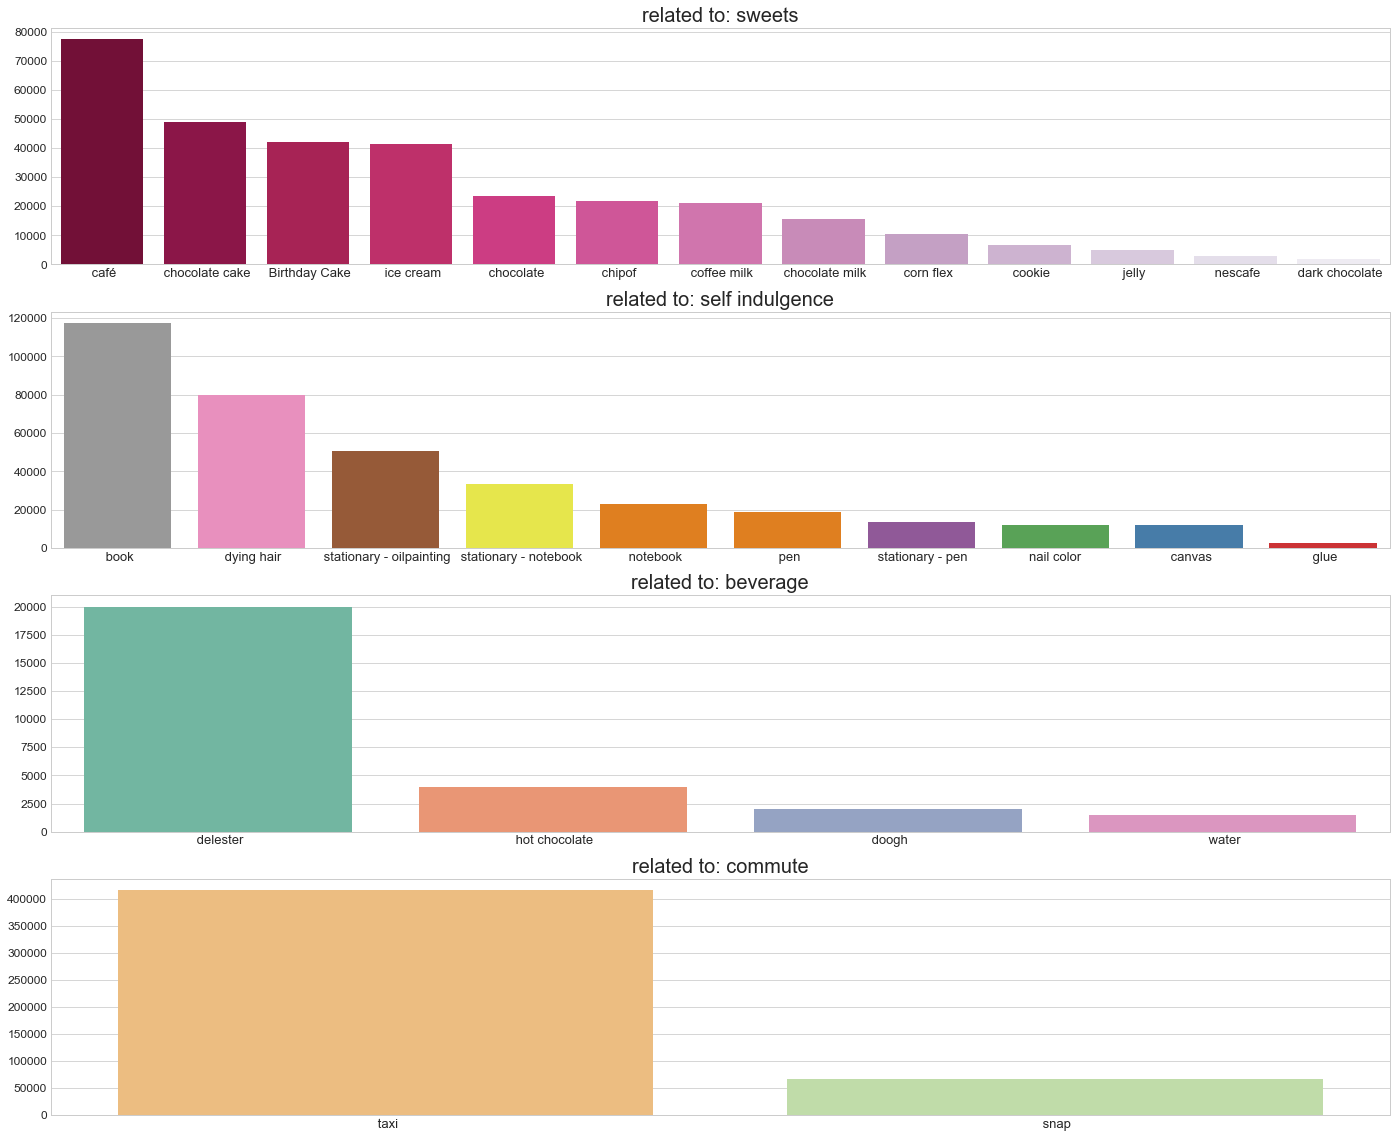

In [138]:
colors = ['PuRd_r', 'Set1_r', 'Set2', 'Spectral' ]
series = [serie_1, serie_2, serie_3, serie_4]
titles = ['sweets', 'self indulgence', 'beverage', 'commute']
fig, ax_ = plt.subplots(4, 1, figsize=(24, 20))
for i in range(4):
    sns.barplot(x = series[i].index, y = series[i].values, palette = colors[i], ax = ax_[i])
    ax_[i].set_xticklabels(labels = ax_[i].get_xticklabels(),
                    fontsize = 13,);
    ax_[i].set_xlabel('');
    ax_[i].set_title(f'related to: {titles[i]}',
                     fontsize = 20)
    

# A little prediction (if possible)

In [143]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.arima_model import ARIMA

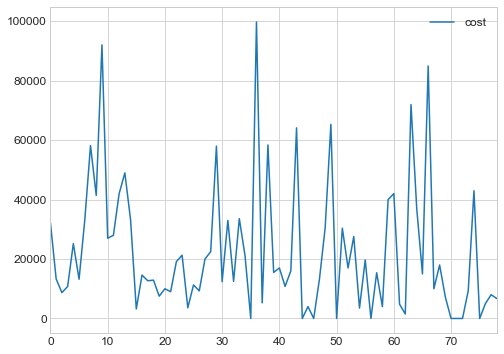

In [149]:
df_1 = df.groupby('date').sum()[['cost']].reset_index()
df_1.plot()

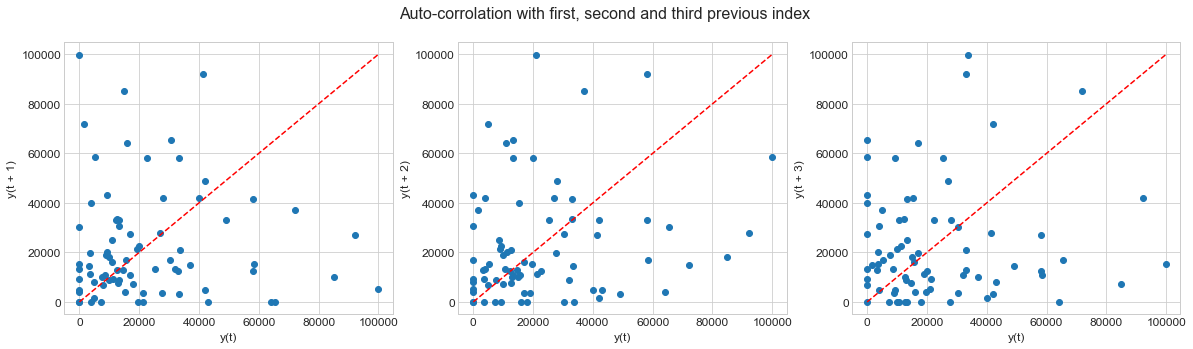

In [151]:
from pandas.plotting import lag_plot, autocorrelation_plot
fig, ax_ = plt.subplots(1, 3, figsize = (20, 5))
serie = df_1.cost
for i in range(3):
    
    lag_plot((serie), lag = i+1, ax = ax_[i]);
    ax_[i].plot([min(serie), max(serie)], [min(serie), max(serie)],'--', color = 'red' )

fig.suptitle('Auto-corrolation with first, second and third previous index', fontsize = 16);

There is no auto correlation in this time series so we can't just predict my future spendings based on my previous costs.

So this was a quick analysis on how much I've spent before and after quarantine! I hope you enjoyed looking at my sexy plots and analysis ;) Love to here from you guys, plz let me know if you had any comments or questions!

In [ ]:
email: mitra.mirshafiee@gamil.com